In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import interactive
from IPython import get_ipython
import datetime
import os
interactive(True)
plt.close("all") # close all figures
plt.rcParams.update({'font.size': 9}) # set font size in the graph
#'Users/39333/Desktop/env modelling/assign 4/tutorial 6/Assignment4.py'
#os.chdir('Users/39333/Desktop/env modelling/assign 4/tutorial 6/Assignment4.py')


# %% ==========================================================================
# Task 1
# =============================================================================

flowdata = pd.read_csv('dataViby_flow_180613_180801.csv', sep=";", parse_dates=['time'])

NH4data = pd.read_csv('dataViby_NH4_180613_180801.csv', sep=";", parse_dates=['time']) # mg/L aka g/m^3
NH4data['nh4'].iloc[21677] = (NH4data['nh4'].iloc[21676] + NH4data['nh4'].iloc[21678]) / 2
NH4data['nh4'].iloc[33000] = (NH4data['nh4'].iloc[32999] + NH4data['nh4'].iloc[33001]) / 2
NH4data['nh4'].iloc[34547] = (NH4data['nh4'].iloc[34546] + NH4data['nh4'].iloc[34548]) / 2

# smoothing and removing NaNs
flowdata['smoothed'] = flowdata.iloc[:,1].rolling(window=720).mean()
flowdata = flowdata.iloc[719:,:]
NH4data = NH4data.iloc[719:,:]

NH4flux = pd.DataFrame(columns=['time','measured','model 0','model 2','model 3'])
# concentration = flux/flow so flux = concentration*flow
NH4flux['measured'] = (NH4data['nh4'])*flowdata['smoothed'] # m^3/hr * g/m^3 = g/hr
NH4flux['time'] = flowdata['time']

# plt.plot_date(flowdata['time'], flowdata['flow'], color = 'blue', linestyle = '-', marker = "", label = 'flow')
# plt.plot_date(flowdata['time'], flowdata['smoothed'], color = 'red', linestyle = '--', marker = "", label = 'smoothed')
# plt.title('Flow and NH$4^+$ in Viby, 13/06/2018-01/08/2018')
# plt.ylim([50, 500])
# plt.legend()
# plt.grid()


C:\Users\39333\AppData\Local\Temp/ipykernel_6400/3199140605.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NH4data['nh4'].iloc[21677] = (NH4data['nh4'].iloc[21676] + NH4data['nh4'].iloc[21678]) / 2
C:\Users\39333\AppData\Local\Temp/ipykernel_6400/3199140605.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NH4data['nh4'].iloc[33000] = (NH4data['nh4'].iloc[32999] + NH4data['nh4'].iloc[33001]) / 2
C:\Users\39333\AppData\Local\Temp/ipykernel_6400/3199140605.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata

C:\Users\39333\AppData\Local\Temp/ipykernel_6400/709011406.py:4: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot_date(flowdata['time'], flowdata['flow'], color = 'blue', linestyle = '-', marker = "", label = 'flow')
C:\Users\39333\AppData\Local\Temp/ipykernel_6400/709011406.py:5: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot_date(flowdata['time'], flowdata['smoothed'], color = 'red', linestyle = '--', marker = "", label = 'smoothed')
C:\Users\39333\AppData\Local\Temp/ipykernel_6400/709011406.py:11: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot_date(flowdata['time'], NH4data['nh4'], color = 'red', linestyle = '-', marker = 

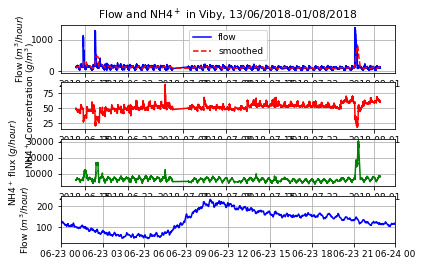

In [17]:
plt.figure()
# flow
ax1=plt.subplot(4,1,1)
plt.plot_date(flowdata['time'], flowdata['flow'], color = 'blue', linestyle = '-', marker = "", label = 'flow')
plt.plot_date(flowdata['time'], flowdata['smoothed'], color = 'red', linestyle = '--', marker = "", label = 'smoothed')
ax1.set_ylabel('Flow $(m^3/hour)$') #add y-label
plt.title('Flow and NH$4^+$ in Viby, 13/06/2018-01/08/2018')
plt.legend()
# concentration
ax2=plt.subplot(4,1,2)
plt.plot_date(flowdata['time'], NH4data['nh4'], color = 'red', linestyle = '-', marker = "", label = 'measured')
ax2.set_ylabel('NH$4^+$ Concentration $(g/m^3)$') #add y-label
# flux
ax3=plt.subplot(4,1,3)
plt.plot_date(flowdata['time'], NH4flux['measured'], color = 'green', linestyle = '-', marker = "", label = 'measured')
ax3.set_ylabel('NH$4^+$ flux $(g/hour)$') #add y-label
# day
ax4=plt.subplot(4,1,4)
plt.plot_date(flowdata['time'], flowdata['flow'], color = 'blue', linestyle = '-', marker = "")
ax4.set_ylabel('Flow $(m^3/hour)$') #add y-label
plt.xlim([datetime.date(2018, 6, 23), datetime.date(2018, 6, 24)])
plt.ylim([25, 250])
# making it look nice
ax1.grid(True)
ax2.grid(True)
ax3.grid(True)
ax4.grid(True)


# plt.figure()
# plt.plot_date(flowdata['time'], flowdata['flow'], color = 'blue', linestyle = '-', marker = "", label = 'flow')
# plt.ylabel('Flow $(m^3/hour)$') #add y-label
# plt.title('A Day of Flow in Viby')
# # xt=pd.date_range(start = min(flowdata['time']), end = max(flowdata['time']),freq="6H")
# # plt.xticks(xt)
# # plt.xticklabels(xt.strftime("%Y-%m-%d"))
# import datetime
# plt.xlim([datetime.date(2018, 6, 23), datetime.date(2018, 6, 25)])
# plt.ylim([25, 250])
# plt.grid(True) #add grid to graphs
# plt.legend()

c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
C:\Users\39333\AppData\Local\Temp/ipykernel_6400/2519046055.py:57: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot_date(flowdata['time'], NH4flux['measured'], color = 'black', linestyle = '-', marker = "", label = 'measured',linewidth=1)
C:\Users\39333\AppData\Local\Temp/ipykernel_6400/2519046055.py:58: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot_date(out0['time'], out0['simNH4load'], color = 'red', linestyle = '-', marker = "", label = 'model 0',linewidth=1)
C:\Users\39333\AppData\Local\Temp/ipykernel_6400/2519046055.py:59: UserWarning: marker is redundantly d

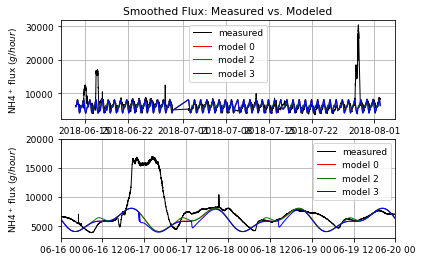

In [18]:
# %% model testing

import NH4models as NH4
# parameters--medians from Pedersen
# best guess 19/11: 6100, -1500, 200, -800, 50
a0 = 6000
a1 = -1500
a2 = 200
b1 = -800
b2 = 50

# best guess 19/11: 600, 4*60, 11/24
c12 = 600
c22 = 4*60
c32 = 11/24

# best guess 0.2, 3, 4, 250
c13 = 0.2
c23 = 3
c33 = 4
flowThr = 250

par0 = np.zeros(8)
par0[0] = a0
par0[1] = a1
par0[2] = a2
par0[3] = b1
par0[4] = b2

par2 = np.zeros(8)
par2[0] = a0
par2[1] = a1
par2[2] = a2
par2[3] = b1
par2[4] = b2
par2[5] = c12
par2[6] = c22
par2[7] = c32

par3 = np.zeros(8)
par3[0] = a0
par3[1] = a1
par3[2] = a2
par3[3] = b1
par3[4] = b2
par3[5] = c13
par3[6] = c23
par3[7] = c33

out0 = NH4.NH4inletModel0(par0,flowdata)
out2 = NH4.NH4inletModel2(par2,flowdata)
out3 = NH4.NH4inletModel3(par3,flowdata,flowThr)

# flux plot
plt.figure()
ax1=plt.subplot(2,1,1)
plt.plot_date(flowdata['time'], NH4flux['measured'], color = 'black', linestyle = '-', marker = "", label = 'measured',linewidth=1)
plt.plot_date(out0['time'], out0['simNH4load'], color = 'red', linestyle = '-', marker = "", label = 'model 0',linewidth=1)
plt.plot_date(out2['time'], out2['simNH4load'], color = 'green', linestyle = '-', marker = "", label = 'model 2',linewidth=1)
plt.plot_date(out3['time'], out3['simNH4load'], color = 'blue', linestyle = '-', marker = "", label = 'model 3',linewidth=1)
ax1.set_ylabel('NH$4^+$ flux $(g/hour)$') #add y-label
ax1.grid(True)
plt.title('Smoothed Flux: Measured vs. Modeled')
plt.legend()

ax2=plt.subplot(2,1,2)
plt.plot_date(flowdata['time'], NH4flux['measured'], color = 'black', linestyle = '-', marker = "", label = 'measured',linewidth=1)
plt.plot_date(out0['time'], out0['simNH4load'], color = 'red', linestyle = '-', marker = "", label = 'model 0',linewidth=1)
plt.plot_date(out2['time'], out2['simNH4load'], color = 'green', linestyle = '-', marker = "", label = 'model 2',linewidth=1)
plt.plot_date(out3['time'], out3['simNH4load'], color = 'blue', linestyle = '-', marker = "", label = 'model 3',linewidth=1)
ax2.set_ylabel('NH$4^+$ flux $(g/hour)$') #add y-label
plt.xlim([datetime.date(2018, 6, 16), datetime.date(2018, 6, 20)])
plt.ylim([3000, 20000])
ax2.grid(True)
plt.legend()


# concentration plot
# plt.figure()
# ax1=plt.subplot(2,1,1)
# plt.plot_date(flowdata['time'], NH4data['nh4'], color = 'black', linestyle = '-', marker = "", label = 'measured')
# plt.plot_date(out0['time'], out0['simNH4conc'], color = 'red', linestyle = '-', marker = "", label = 'model 0')
# plt.plot_date(out2['time'], out2['simNH4conc'], color = 'green', linestyle = '-', marker = "", label = 'model 2')
# plt.plot_date(out3['time'], out3['simNH4conc'], color = 'blue', linestyle = '-', marker = "", label = 'model 3')
# ax1.set_ylabel('NH$4^+$ concentration $(g/m^3)$') #add y-label
# ax1.grid(True)
# plt.title('Concentrations: Measured vs. Modeled')
# plt.legend()

# ax2=plt.subplot(2,1,2)
# plt.plot_date(flowdata['time'], NH4data['nh4'], color = 'black', linestyle = '-', marker = "", label = 'measured')
# plt.plot_date(out0['time'], out0['simNH4conc'], color = 'red', linestyle = '-', marker = "", label = 'model 0')
# plt.plot_date(out2['time'], out2['simNH4conc'], color = 'green', linestyle = '-', marker = "", label = 'model 2')
# plt.plot_date(out3['time'], out3['simNH4conc'], color = 'blue', linestyle = '-', marker = "", label = 'model 3')
# ax2.set_ylabel('NH$4^+$ concentration $(g/m^3)$') #add y-label
# plt.xlim([datetime.date(2018, 6, 16), datetime.date(2018, 6, 22)])
# plt.ylim([0, 250])
# ax2.grid(True)
# plt.legend()

In [19]:
# %% objective function analysis

# wet weather event threshold (m^3/hour)
flowThr = 250

# define events
# you find the values of your data above the threshold
idxFlowAboveThr = flowdata['flow']>flowThr # this gives you a Boolean vector
# you need to covert the Boolean (true/false) into an integer (1/0)
idxFlowAboveThr = idxFlowAboveThr.astype(int)
# now calculate where there is a change in the status (from below to above the threshold or viceversa by calculating the difference between each step
idxFlowAboveThr = idxFlowAboveThr.diff()
# find when the flow went above the threshold (from 0 to 1)
evStart = idxFlowAboveThr[idxFlowAboveThr>0]
# find when the flow went below the threshold (from 1 to 0)
evEnd = idxFlowAboveThr[idxFlowAboveThr<0]-1
# find the indices of the event start and end
idxEvStart = evStart.index
idxEvEnd = evEnd.index-1 # the step before was the last one with flow above thresh

# declare vectors for both simulations
dummySimulation0 = np.array([]) #the array to save the aggregate results
dummyObservation0 = np.array([]) #the array to save the aggregate measurements
dummySimulation2 = np.array([]) #the array to save the aggregate results
dummyObservation2 = np.array([]) #the array to save the aggregate measurements
dummySimulation3 = np.array([]) #the array to save the aggregate results
dummyObservation3 = np.array([]) #the array to save the aggregate measurements

NH4flux['model 0'] = out0['simNH4load']
NH4flux['model 2'] = out2['simNH4load']
NH4flux['model 3'] = out3['simNH4load']

import objective_functions as objFun
# loop over events
for ev in range (len(idxEvStart)):
    startDate = flowdata['time'][idxEvStart[ev]]
    stopDate = flowdata['time'][idxEvEnd[ev]]
    stopDate=pd.to_datetime(stopDate) + pd.DateOffset(2) # lag time
    # find indices of the event
    idxEv=(flowdata['time']>startDate) & (flowdata['time']<=stopDate)
    # running a dummy simulation
    dummySimulation0 = np.concatenate((dummySimulation0, NH4flux['model 0'][idxEv]))
    dummyObservation0 = np.concatenate((dummyObservation0, NH4flux['measured'][idxEv]))
    dummySimulation2 = np.concatenate((dummySimulation2, NH4flux['model 2'][idxEv]))
    dummyObservation2 = np.concatenate((dummyObservation2, NH4flux['measured'][idxEv]))
    dummySimulation3 = np.concatenate((dummySimulation3, NH4flux['model 3'][idxEv]))
    dummyObservation3 = np.concatenate((dummyObservation3, NH4flux['measured'][idxEv]))

MARE0 = objFun.MARE(dummyObservation0, dummySimulation0)*100
MARE2 = objFun.MARE(dummyObservation2, dummySimulation2)*100
MARE3 = objFun.MARE(dummyObservation3, dummySimulation3)*100

# %% 
# =============================================================================
# Task 2
# =============================================================================
# Local sensitivity analysis (Marius)

import objective_functions as objFun

# OAT Sensitivity analysis
parSample0 = np.tile(par2,(9,1))
dPar = 0.1
for i in range(8):
    parSample0[i+1,i] = parSample0[i+1,i]*(1+dPar)

# Reference
out0 = NH4.NH4inletModel2(parSample0[0,:], flowdata)
out01 = objFun.MARE(NH4flux['model 2'],out0['simNH4load'])+0.1

outA1 = NH4.NH4inletModel2(parSample0[1,:], flowdata)
outB1 = objFun.MARE(NH4flux['model 2'],outA1['simNH4load'])+0.1

outA2 = NH4.NH4inletModel2(parSample0[2,:], flowdata)
outB2 = objFun.MARE(NH4flux['model 2'],outA2['simNH4load'])+0.1

outA3 = NH4.NH4inletModel2(parSample0[3,:], flowdata)
outB3 = objFun.MARE(NH4flux['model 2'],outA3['simNH4load'])+0.1

outA4 = NH4.NH4inletModel2(parSample0[4,:], flowdata)
outB4 = objFun.MARE(NH4flux['model 2'],outA4['simNH4load'])+0.1

outA5 = NH4.NH4inletModel2(parSample0[5,:], flowdata)
outB5 = objFun.MARE(NH4flux['model 2'],outA5['simNH4load'])+0.1

outA6 = NH4.NH4inletModel2(parSample0[6,:], flowdata)
outB6 = objFun.MARE(NH4flux['model 2'],outA6['simNH4load'])+0.1

outA7 = NH4.NH4inletModel2(parSample0[7,:], flowdata)
outB7 = objFun.MARE(NH4flux['model 2'],outA7['simNH4load'])+0.1

outA8 = NH4.NH4inletModel2(parSample0[8,:], flowdata)
outB8 = objFun.MARE(NH4flux['model 2'],outA8['simNH4load'])+0.1

# Last Conc
# MARE
Si_MARE=np.zeros(8)
Si_MARE[0]=((outB1-out01)/out01)/dPar
Si_MARE[1]=((outB2-out01)/out01)/dPar
Si_MARE[2]=((outB3-out01)/out01)/dPar
Si_MARE[3]=((outB4-out01)/out01)/dPar
Si_MARE[4]=((outB5-out01)/out01)/dPar
Si_MARE[5]=((outB6-out01)/out01)/dPar
Si_MARE[6]=((outB7-out01)/out01)/dPar
Si_MARE[7]=((outB8-out01)/out01)/dPar


c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944:

c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)


['analyzing parameter set 0out of 450']
['analyzing parameter set 1out of 450']
['analyzing parameter set 2out of 450']
['analyzing parameter set 3out of 450']
['analyzing parameter set 4out of 450']
['analyzing parameter set 5out of 450']
['analyzing parameter set 6out of 450']


c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944:

['analyzing parameter set 7out of 450']
['analyzing parameter set 8out of 450']
['analyzing parameter set 9out of 450']
['analyzing parameter set 10out of 450']
['analyzing parameter set 11out of 450']
['analyzing parameter set 12out of 450']
['analyzing parameter set 13out of 450']


c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944:

['analyzing parameter set 14out of 450']
['analyzing parameter set 15out of 450']
['analyzing parameter set 16out of 450']
['analyzing parameter set 17out of 450']
['analyzing parameter set 18out of 450']
['analyzing parameter set 19out of 450']
['analyzing parameter set 20out of 450']


c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944:

['analyzing parameter set 21out of 450']
['analyzing parameter set 22out of 450']
['analyzing parameter set 23out of 450']
['analyzing parameter set 24out of 450']
['analyzing parameter set 25out of 450']
['analyzing parameter set 26out of 450']
['analyzing parameter set 27out of 450']
['analyzing parameter set 28out of 450']


c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944:

['analyzing parameter set 29out of 450']
['analyzing parameter set 30out of 450']
['analyzing parameter set 31out of 450']
['analyzing parameter set 32out of 450']
['analyzing parameter set 33out of 450']
['analyzing parameter set 34out of 450']
['analyzing parameter set 35out of 450']


c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944:

['analyzing parameter set 36out of 450']
['analyzing parameter set 37out of 450']
['analyzing parameter set 38out of 450']
['analyzing parameter set 39out of 450']
['analyzing parameter set 40out of 450']
['analyzing parameter set 41out of 450']
['analyzing parameter set 42out of 450']
['analyzing parameter set 43out of 450']


c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944:

['analyzing parameter set 44out of 450']
['analyzing parameter set 45out of 450']
['analyzing parameter set 46out of 450']
['analyzing parameter set 47out of 450']
['analyzing parameter set 48out of 450']
['analyzing parameter set 49out of 450']
['analyzing parameter set 50out of 450']
['analyzing parameter set 51out of 450']


c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944:

['analyzing parameter set 52out of 450']
['analyzing parameter set 53out of 450']
['analyzing parameter set 54out of 450']
['analyzing parameter set 55out of 450']
['analyzing parameter set 56out of 450']
['analyzing parameter set 57out of 450']
['analyzing parameter set 58out of 450']
['analyzing parameter set 59out of 450']


c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944:

['analyzing parameter set 60out of 450']
['analyzing parameter set 61out of 450']
['analyzing parameter set 62out of 450']
['analyzing parameter set 63out of 450']
['analyzing parameter set 64out of 450']
['analyzing parameter set 65out of 450']
['analyzing parameter set 66out of 450']
['analyzing parameter set 67out of 450']


c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944:

['analyzing parameter set 68out of 450']
['analyzing parameter set 69out of 450']
['analyzing parameter set 70out of 450']
['analyzing parameter set 71out of 450']
['analyzing parameter set 72out of 450']
['analyzing parameter set 73out of 450']
['analyzing parameter set 74out of 450']


c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944:

['analyzing parameter set 75out of 450']
['analyzing parameter set 76out of 450']
['analyzing parameter set 77out of 450']
['analyzing parameter set 78out of 450']
['analyzing parameter set 79out of 450']
['analyzing parameter set 80out of 450']
['analyzing parameter set 81out of 450']
['analyzing parameter set 82out of 450']


c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944:

['analyzing parameter set 83out of 450']
['analyzing parameter set 84out of 450']
['analyzing parameter set 85out of 450']
['analyzing parameter set 86out of 450']
['analyzing parameter set 87out of 450']
['analyzing parameter set 88out of 450']
['analyzing parameter set 89out of 450']
['analyzing parameter set 90out of 450']


c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944:

['analyzing parameter set 91out of 450']
['analyzing parameter set 92out of 450']
['analyzing parameter set 93out of 450']
['analyzing parameter set 94out of 450']
['analyzing parameter set 95out of 450']
['analyzing parameter set 96out of 450']
['analyzing parameter set 97out of 450']
['analyzing parameter set 98out of 450']


c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)


['analyzing parameter set 99out of 450']
['analyzing parameter set 100out of 450']
['analyzing parameter set 101out of 450']
['analyzing parameter set 102out of 450']
['analyzing parameter set 103out of 450']
['analyzing parameter set 104out of 450']
['analyzing parameter set 105out of 450']
['analyzing parameter set 106out of 450']


c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944:

['analyzing parameter set 107out of 450']
['analyzing parameter set 108out of 450']
['analyzing parameter set 109out of 450']
['analyzing parameter set 110out of 450']
['analyzing parameter set 111out of 450']
['analyzing parameter set 112out of 450']
['analyzing parameter set 113out of 450']
['analyzing parameter set 114out of 450']


c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944:

['analyzing parameter set 115out of 450']
['analyzing parameter set 116out of 450']
['analyzing parameter set 117out of 450']
['analyzing parameter set 118out of 450']
['analyzing parameter set 119out of 450']
['analyzing parameter set 120out of 450']
['analyzing parameter set 121out of 450']


c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944:

['analyzing parameter set 122out of 450']
['analyzing parameter set 123out of 450']
['analyzing parameter set 124out of 450']
['analyzing parameter set 125out of 450']
['analyzing parameter set 126out of 450']
['analyzing parameter set 127out of 450']
['analyzing parameter set 128out of 450']


c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944:

['analyzing parameter set 129out of 450']
['analyzing parameter set 130out of 450']
['analyzing parameter set 131out of 450']
['analyzing parameter set 132out of 450']
['analyzing parameter set 133out of 450']
['analyzing parameter set 134out of 450']
['analyzing parameter set 135out of 450']


c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944:

['analyzing parameter set 136out of 450']
['analyzing parameter set 137out of 450']
['analyzing parameter set 138out of 450']
['analyzing parameter set 139out of 450']
['analyzing parameter set 140out of 450']
['analyzing parameter set 141out of 450']
['analyzing parameter set 142out of 450']
['analyzing parameter set 143out of 450']


c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944:

['analyzing parameter set 144out of 450']
['analyzing parameter set 145out of 450']
['analyzing parameter set 146out of 450']
['analyzing parameter set 147out of 450']
['analyzing parameter set 148out of 450']
['analyzing parameter set 149out of 450']
['analyzing parameter set 150out of 450']
['analyzing parameter set 151out of 450']


c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944:

['analyzing parameter set 152out of 450']
['analyzing parameter set 153out of 450']
['analyzing parameter set 154out of 450']
['analyzing parameter set 155out of 450']
['analyzing parameter set 156out of 450']
['analyzing parameter set 157out of 450']
['analyzing parameter set 158out of 450']
['analyzing parameter set 159out of 450']


c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944:

['analyzing parameter set 160out of 450']
['analyzing parameter set 161out of 450']
['analyzing parameter set 162out of 450']
['analyzing parameter set 163out of 450']
['analyzing parameter set 164out of 450']
['analyzing parameter set 165out of 450']
['analyzing parameter set 166out of 450']
['analyzing parameter set 167out of 450']
['analyzing parameter set 168out of 450']


c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944:

['analyzing parameter set 169out of 450']
['analyzing parameter set 170out of 450']
['analyzing parameter set 171out of 450']
['analyzing parameter set 172out of 450']
['analyzing parameter set 173out of 450']
['analyzing parameter set 174out of 450']
['analyzing parameter set 175out of 450']
['analyzing parameter set 176out of 450']


c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944:

['analyzing parameter set 177out of 450']
['analyzing parameter set 178out of 450']
['analyzing parameter set 179out of 450']
['analyzing parameter set 180out of 450']
['analyzing parameter set 181out of 450']
['analyzing parameter set 182out of 450']
['analyzing parameter set 183out of 450']


c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944:

['analyzing parameter set 184out of 450']
['analyzing parameter set 185out of 450']
['analyzing parameter set 186out of 450']
['analyzing parameter set 187out of 450']
['analyzing parameter set 188out of 450']
['analyzing parameter set 189out of 450']
['analyzing parameter set 190out of 450']
['analyzing parameter set 191out of 450']


c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944:

['analyzing parameter set 192out of 450']
['analyzing parameter set 193out of 450']
['analyzing parameter set 194out of 450']
['analyzing parameter set 195out of 450']
['analyzing parameter set 196out of 450']
['analyzing parameter set 197out of 450']
['analyzing parameter set 198out of 450']
['analyzing parameter set 199out of 450']
['analyzing parameter set 200out of 450']


c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944:

['analyzing parameter set 201out of 450']
['analyzing parameter set 202out of 450']
['analyzing parameter set 203out of 450']
['analyzing parameter set 204out of 450']
['analyzing parameter set 205out of 450']
['analyzing parameter set 206out of 450']
['analyzing parameter set 207out of 450']
['analyzing parameter set 208out of 450']


c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944:

['analyzing parameter set 209out of 450']
['analyzing parameter set 210out of 450']
['analyzing parameter set 211out of 450']
['analyzing parameter set 212out of 450']
['analyzing parameter set 213out of 450']
['analyzing parameter set 214out of 450']
['analyzing parameter set 215out of 450']
['analyzing parameter set 216out of 450']


c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944:

['analyzing parameter set 217out of 450']
['analyzing parameter set 218out of 450']
['analyzing parameter set 219out of 450']
['analyzing parameter set 220out of 450']
['analyzing parameter set 221out of 450']
['analyzing parameter set 222out of 450']
['analyzing parameter set 223out of 450']
['analyzing parameter set 224out of 450']


c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944:

['analyzing parameter set 225out of 450']
['analyzing parameter set 226out of 450']
['analyzing parameter set 227out of 450']
['analyzing parameter set 228out of 450']
['analyzing parameter set 229out of 450']
['analyzing parameter set 230out of 450']


c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944:

['analyzing parameter set 231out of 450']
['analyzing parameter set 232out of 450']
['analyzing parameter set 233out of 450']
['analyzing parameter set 234out of 450']
['analyzing parameter set 235out of 450']
['analyzing parameter set 236out of 450']
['analyzing parameter set 237out of 450']


c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944:

['analyzing parameter set 238out of 450']
['analyzing parameter set 239out of 450']
['analyzing parameter set 240out of 450']
['analyzing parameter set 241out of 450']
['analyzing parameter set 242out of 450']
['analyzing parameter set 243out of 450']
['analyzing parameter set 244out of 450']


c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944:

['analyzing parameter set 245out of 450']
['analyzing parameter set 246out of 450']
['analyzing parameter set 247out of 450']
['analyzing parameter set 248out of 450']
['analyzing parameter set 249out of 450']
['analyzing parameter set 250out of 450']
['analyzing parameter set 251out of 450']
['analyzing parameter set 252out of 450']


c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944:

['analyzing parameter set 253out of 450']
['analyzing parameter set 254out of 450']
['analyzing parameter set 255out of 450']
['analyzing parameter set 256out of 450']
['analyzing parameter set 257out of 450']
['analyzing parameter set 258out of 450']
['analyzing parameter set 259out of 450']
['analyzing parameter set 260out of 450']


c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944:

['analyzing parameter set 261out of 450']
['analyzing parameter set 262out of 450']
['analyzing parameter set 263out of 450']
['analyzing parameter set 264out of 450']
['analyzing parameter set 265out of 450']
['analyzing parameter set 266out of 450']
['analyzing parameter set 267out of 450']


c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944:

['analyzing parameter set 268out of 450']
['analyzing parameter set 269out of 450']
['analyzing parameter set 270out of 450']
['analyzing parameter set 271out of 450']
['analyzing parameter set 272out of 450']
['analyzing parameter set 273out of 450']
['analyzing parameter set 274out of 450']
['analyzing parameter set 275out of 450']


c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944:

['analyzing parameter set 276out of 450']
['analyzing parameter set 277out of 450']
['analyzing parameter set 278out of 450']
['analyzing parameter set 279out of 450']
['analyzing parameter set 280out of 450']
['analyzing parameter set 281out of 450']


c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944:

['analyzing parameter set 282out of 450']
['analyzing parameter set 283out of 450']
['analyzing parameter set 284out of 450']
['analyzing parameter set 285out of 450']
['analyzing parameter set 286out of 450']
['analyzing parameter set 287out of 450']
['analyzing parameter set 288out of 450']
['analyzing parameter set 289out of 450']


c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944:

['analyzing parameter set 290out of 450']
['analyzing parameter set 291out of 450']
['analyzing parameter set 292out of 450']
['analyzing parameter set 293out of 450']
['analyzing parameter set 294out of 450']
['analyzing parameter set 295out of 450']
['analyzing parameter set 296out of 450']


c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944:

['analyzing parameter set 297out of 450']
['analyzing parameter set 298out of 450']
['analyzing parameter set 299out of 450']
['analyzing parameter set 300out of 450']
['analyzing parameter set 301out of 450']
['analyzing parameter set 302out of 450']
['analyzing parameter set 303out of 450']


c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944:

['analyzing parameter set 304out of 450']
['analyzing parameter set 305out of 450']
['analyzing parameter set 306out of 450']
['analyzing parameter set 307out of 450']
['analyzing parameter set 308out of 450']
['analyzing parameter set 309out of 450']
['analyzing parameter set 310out of 450']
['analyzing parameter set 311out of 450']


c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944:

['analyzing parameter set 312out of 450']
['analyzing parameter set 313out of 450']
['analyzing parameter set 314out of 450']
['analyzing parameter set 315out of 450']
['analyzing parameter set 316out of 450']
['analyzing parameter set 317out of 450']
['analyzing parameter set 318out of 450']


c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944:

['analyzing parameter set 319out of 450']
['analyzing parameter set 320out of 450']
['analyzing parameter set 321out of 450']
['analyzing parameter set 322out of 450']
['analyzing parameter set 323out of 450']
['analyzing parameter set 324out of 450']


c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944:

['analyzing parameter set 325out of 450']
['analyzing parameter set 326out of 450']
['analyzing parameter set 327out of 450']
['analyzing parameter set 328out of 450']
['analyzing parameter set 329out of 450']
['analyzing parameter set 330out of 450']
['analyzing parameter set 331out of 450']
['analyzing parameter set 332out of 450']


c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)


['analyzing parameter set 333out of 450']
['analyzing parameter set 334out of 450']
['analyzing parameter set 335out of 450']
['analyzing parameter set 336out of 450']
['analyzing parameter set 337out of 450']
['analyzing parameter set 338out of 450']
['analyzing parameter set 339out of 450']


c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944:

['analyzing parameter set 340out of 450']
['analyzing parameter set 341out of 450']
['analyzing parameter set 342out of 450']
['analyzing parameter set 343out of 450']
['analyzing parameter set 344out of 450']
['analyzing parameter set 345out of 450']
['analyzing parameter set 346out of 450']


c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944:

['analyzing parameter set 347out of 450']
['analyzing parameter set 348out of 450']
['analyzing parameter set 349out of 450']
['analyzing parameter set 350out of 450']
['analyzing parameter set 351out of 450']
['analyzing parameter set 352out of 450']
['analyzing parameter set 353out of 450']
['analyzing parameter set 354out of 450']


c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944:

['analyzing parameter set 355out of 450']
['analyzing parameter set 356out of 450']
['analyzing parameter set 357out of 450']
['analyzing parameter set 358out of 450']
['analyzing parameter set 359out of 450']
['analyzing parameter set 360out of 450']
['analyzing parameter set 361out of 450']
['analyzing parameter set 362out of 450']


c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944:

['analyzing parameter set 363out of 450']
['analyzing parameter set 364out of 450']
['analyzing parameter set 365out of 450']
['analyzing parameter set 366out of 450']
['analyzing parameter set 367out of 450']
['analyzing parameter set 368out of 450']
['analyzing parameter set 369out of 450']


c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944:

['analyzing parameter set 370out of 450']
['analyzing parameter set 371out of 450']
['analyzing parameter set 372out of 450']
['analyzing parameter set 373out of 450']
['analyzing parameter set 374out of 450']
['analyzing parameter set 375out of 450']


c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944:

['analyzing parameter set 376out of 450']
['analyzing parameter set 377out of 450']
['analyzing parameter set 378out of 450']
['analyzing parameter set 379out of 450']
['analyzing parameter set 380out of 450']
['analyzing parameter set 381out of 450']
['analyzing parameter set 382out of 450']
['analyzing parameter set 383out of 450']


c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944:

['analyzing parameter set 384out of 450']
['analyzing parameter set 385out of 450']
['analyzing parameter set 386out of 450']
['analyzing parameter set 387out of 450']
['analyzing parameter set 388out of 450']
['analyzing parameter set 389out of 450']
['analyzing parameter set 390out of 450']
['analyzing parameter set 391out of 450']


c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944:

['analyzing parameter set 392out of 450']
['analyzing parameter set 393out of 450']
['analyzing parameter set 394out of 450']
['analyzing parameter set 395out of 450']
['analyzing parameter set 396out of 450']
['analyzing parameter set 397out of 450']
['analyzing parameter set 398out of 450']
['analyzing parameter set 399out of 450']


c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944:

['analyzing parameter set 400out of 450']
['analyzing parameter set 401out of 450']
['analyzing parameter set 402out of 450']
['analyzing parameter set 403out of 450']
['analyzing parameter set 404out of 450']
['analyzing parameter set 405out of 450']
['analyzing parameter set 406out of 450']
['analyzing parameter set 407out of 450']


c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944:

['analyzing parameter set 408out of 450']
['analyzing parameter set 409out of 450']
['analyzing parameter set 410out of 450']
['analyzing parameter set 411out of 450']
['analyzing parameter set 412out of 450']
['analyzing parameter set 413out of 450']


c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944:

['analyzing parameter set 414out of 450']
['analyzing parameter set 415out of 450']
['analyzing parameter set 416out of 450']
['analyzing parameter set 417out of 450']
['analyzing parameter set 418out of 450']
['analyzing parameter set 419out of 450']
['analyzing parameter set 420out of 450']


c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944:

['analyzing parameter set 421out of 450']
['analyzing parameter set 422out of 450']
['analyzing parameter set 423out of 450']
['analyzing parameter set 424out of 450']
['analyzing parameter set 425out of 450']
['analyzing parameter set 426out of 450']
['analyzing parameter set 427out of 450']
['analyzing parameter set 428out of 450']


c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944:

['analyzing parameter set 429out of 450']
['analyzing parameter set 430out of 450']
['analyzing parameter set 431out of 450']
['analyzing parameter set 432out of 450']
['analyzing parameter set 433out of 450']
['analyzing parameter set 434out of 450']
['analyzing parameter set 435out of 450']
['analyzing parameter set 436out of 450']


c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944:

['analyzing parameter set 437out of 450']
['analyzing parameter set 438out of 450']
['analyzing parameter set 439out of 450']
['analyzing parameter set 440out of 450']
['analyzing parameter set 441out of 450']
['analyzing parameter set 442out of 450']
['analyzing parameter set 443out of 450']


c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944:

['analyzing parameter set 444out of 450']
['analyzing parameter set 445out of 450']
['analyzing parameter set 446out of 450']
['analyzing parameter set 447out of 450']
['analyzing parameter set 448out of 450']
['analyzing parameter set 449out of 450']
[1.01544515 0.01562622 0.02704816 0.00613225 0.00171776 0.02211152
 0.00999356 0.0427693 ]


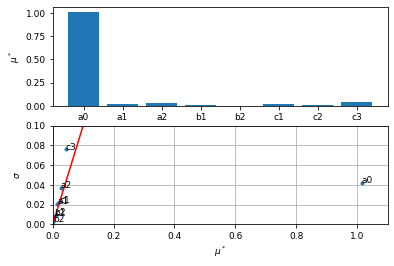

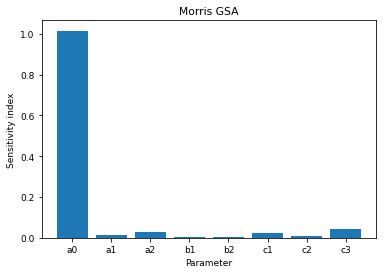

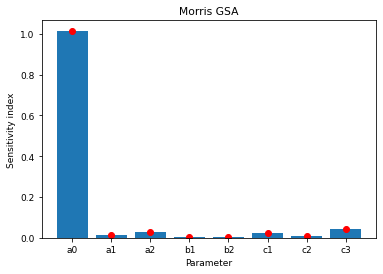

In [20]:
# %% Global sensitivity analysis

param = np.array([('a0', 1000, 7000), ('a1', -2000, 2000), ('a2', -2000, 2000), ('b1', -2000, 2000), ('b2', -2000, 2000), ('c1', 400, 800), ('c2', 1*60, 12*60), ('c3', 0/24, 24/24)], dtype=[('name', 'U10'), ('min', 'f4'), ('max', 'f4')])

# regression GSA
# import GSAregression_asst4 as GSA_regression_fun
# sRegr = GSA_regression_fun.GSAregression(param,flowdata,1000)
# print(abs(sRegr))

# morris GSA
n_trj = 50
import morrisGSA as morrisGSA_fun
[sMorris,dMorris] = morrisGSA_fun.morrisGSA(n_trj,param,flowdata)
print(abs(sMorris))
#improve plots for morris GSA
fig, ax = plt.subplots()
ax.set_title('Morris GSA')
ax.set_ylabel('Sensitivity index')
ax.set_xlabel('Parameter')
ax.set_xticks(np.arange(len(param)))
ax.set_xticklabels(param['name'])
ax.bar(np.arange(len(param)),abs(sMorris))
plt.show()
#improve the plot with the parameters as dots on the graph
fig, ax = plt.subplots()
ax.set_title('Morris GSA')
ax.set_ylabel('Sensitivity index')
ax.set_xlabel('Parameter')
ax.set_xticks(np.arange(len(param)))
ax.set_xticklabels(param['name'])
ax.bar(np.arange(len(param)),abs(sMorris))
ax.plot(np.arange(len(param)),abs(sMorris),'ro')
plt.show()





In [32]:
Calibration = NH4flux['model 2'][0:38875]
Validation = NH4flux['model 2'][38876:62272]
def NH4inletModel2_fit(param,extra_param):
    # parameters to be fitted
    param[0] = a0  # parameter 1 to be estimated
    param[1] = a1# parameter 2 to be estimated
    param[2] = a2 # parameter 2 to be estimated
    param[3] = b1 # parameter 2 to be estimated
    param[4]  = b2# parameter 2 to be estimated
    param[5]   = c32 # parameter 3 to be estimated d
    # extra argument of the function (which do not need to be estimated)
    extra_param[0] = c12
    extra_param[0]= c22

    ########################################################################
    # run the model
    sim_out=NH4.NH4inletModel2(parSample0[0,:],flowdata)
    return sim_out # run the model output

In [34]:
import collections as clt
extraParam = clt.defaultdict(list)
extraParam[0].append(c12)
extraParam[1].append(c22)

cWrap= NH4inletModel2_fit([a0,a1,a2,b1,b2,c32],extraParam)

# def run_NH4inletModel2_fit(param,extra_param,meas_data):
#     sim_out=NH4.NH4inletModel2(parSample0[0,:],flowdata) # run the model
#     MSE=objFun.MSE(NH4flux['model 2'],outA7['simNH4load']) # calculated the obj function
#     return MSE


c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)


In [30]:
def run_NH4inletModel2_bnd(param,extra_param,meas_data,lb,ub):
    import collections as clt
    extraParam = clt.defaultdict(list)
    extraParam[0].append(c12)
    extraParam[1].append(c22)
    cWrap= NH4inletModel2_fit([a0,a1,a2,b1,b2,c32],extraParam)


    if all(lb<param)&all(param<ub): # the candidate point is within the bounds
        sim_out=NH4.NH4inletModel2(param,flowdata) # run the model
        MSE=objFun.MSE(NH4flux['model 2'],sim_out['simNH4load']) # calculated the objfunction
    else: # the candidate point is outside the bounds -> give an absurdly highvalue
        MSE=1e300
    return MSE

In [37]:
c12

600

In [38]:
extraParam[0] = c12
extraParam[1] = c22
print(extraParam[0])
print(extraParam[1])

600
240


In [ ]:
a0 = 6000
a1 = -1500
a2 = 200
b1 = -800
b2 = 50

# best guess 19/11: 600, 4*60, 11/24
c12 = 600
c22 = 4*60
c32 = 11/24

In [39]:
NH4flux['model 2']

719      4785.580136
720      4775.453862
721      4765.388597
722      4755.384758
723      4745.442757
            ...     
65986            NaN
65987            NaN
65988            NaN
65989            NaN
65990            NaN
Name: model 2, Length: 65272, dtype: float64

In [ ]:
param2['min']

In [44]:
param2 = np.array([
    ('a0', 5000, 7000),
    ('a1', -2000, 2000),
    ('a2', -2000, 2000),
    ('b1', -2000, 2000),
    ('b2', -2000, 2000),
    ('c22', 0, 1000),
    ('c32', 0, 1),
    ('c12', 0, 1000)],  # Add the missing element ('c12', 0, 1000)
    dtype=[('name', 'U10'), ('min', 'f4'), ('max', 'f4')])

goodnessOfFit = run_NH4inletModel2_bnd([a0, a1, a2, b1, b2, c12, c22, c32], extraParam, NH4flux['model 2'], param2['min'], param2['max'])

# define start point values for the chosen parameters
x0 = [6000, -1500, 200, -800, 50, 11/24, 600, 4*60]  # Updated x0 values to match the number of parameters


c:\Users\39333\anaconda3\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
